<a href="https://colab.research.google.com/github/AshwinCarvalho999/EDA-on-Hotel-Booking-analysis-project/blob/main/Ashwin_Carvalho_News_Popularity_Prediction_in_Social_Media_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items
* ### TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
* ### TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
* ### TS... (numeric): Level of popularity in time slice ...
* ### TS144 (numeric): Final level of popularity after 2 days upon publication

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy
from spacy.lang.en import English
from sklearn.model_selection import GridSearchCV
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 3/train_file.csv")

In [ ]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [ ]:
df.tail()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
55927,jQ3CeLRCb9,Fidel Castro Lashes Out at Obama After Cuba Visit,Retired Cuban leader Fidel Castro slammed Pres...,Wall Street Journal,obama,2016-03-29 01:35:06,794,10,5,-0.135417,-0.055902
55928,akNYeJ8opY,JOHN CRISP | Obama's strategic reaction to Bru...,President Obama caught some predictable flak f...,Kitsap Sun,obama,2016-03-29 01:35:08,0,0,0,0.236228,0.056110
55929,n2DGs0c8IG,Think Trump's 45 Percent Tariffs Are Bad? Try ...,While Trump wants to put large tariffs on impo...,Huffington Post,obama,2016-03-29 01:35:09,102,4,0,0.025747,0.114820
55930,P0EBiaSEjq,Microsoft finally releases giant Surface,Microsoft’s business customers are finally beg...,TechEye,microsoft,2016-03-29 01:38:00,0,0,0,0.000000,-0.028296
55931,99MLvyAQTJ,Rays of sunshine in the US economy,AS WE all know from listening to the campaign ...,Washington Post,economy,2016-03-29 01:41:08,75,7,19,0.000000,0.184444


In [ ]:
df.shape

(55932, 11)

In [ ]:
list(df.columns)

['IDLink',
 'Title',
 'Headline',
 'Source',
 'Topic',
 'PublishDate',
 'Facebook',
 'GooglePlus',
 'LinkedIn',
 'SentimentTitle',
 'SentimentHeadline']

In [ ]:
df.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [ ]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,IDLink,0
1,Title,0
2,Headline,0
3,Source,175
4,Topic,0
5,PublishDate,0
6,Facebook,0
7,GooglePlus,0
8,LinkedIn,0
9,SentimentTitle,0


In [ ]:
df[df['Source'].isna()]

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
6,lKg2pImhCl,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0,0,0,0.000000,-0.005906
56,ZOKue2cqfO,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 09:29:00,0,0,0,0.000000,0.048546
111,JXfRvxs0R6,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",NaN,palestine,2016-03-01 00:15:00,0,0,0,-0.243068,0.048546
350,A1YOXDsuOO,Human rights situation in Palestinian territor...,In a special meeting convened by the UN Human ...,NaN,palestine,2015-10-28 17:24:00,-1,-1,-1,-0.228299,-0.124931
409,fO2mYsUg5P,Japan Contributes $5.73M To UNRWA’s Food Assis...,"JERUSALEM, October 31, 2015 (WAFA) – The Japan...",NaN,palestine,2015-10-31 04:30:00,-1,-1,-1,0.166667,-0.042878
...,...,...,...,...,...,...,...,...,...,...,...
55482,FJZonPtvqe,"Monday, 28 Mar 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 04:35:00,0,0,0,-0.243068,0.068465
55483,NanKfuNzsO,"Saturday, 16 Apr 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 04:36:00,-1,-1,-1,0.000000,0.068465
55486,ovFBb4XFt4,"Sunday, 17 Apr 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 05:07:00,-1,-1,-1,0.000000,0.068465
55620,H2PlLqiX9U,"Tuesday, 29 Mar 2016","JERICHO, March 28, 2016 (WAFA) – Secretary Gen...",NaN,palestine,2016-03-28 14:06:00,0,0,0,-0.243068,0.068465


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55757 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55757 non-null  object 
 1   Title              55757 non-null  object 
 2   Headline           55757 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55757 non-null  object 
 5   PublishDate        55757 non-null  object 
 6   Facebook           55757 non-null  int64  
 7   GooglePlus         55757 non-null  int64  
 8   LinkedIn           55757 non-null  int64  
 9   SentimentTitle     55757 non-null  float64
 10  SentimentHeadline  55757 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 5.1+ MB


In [ ]:
df['Topic'].value_counts()


economy      20471
obama        16913
microsoft    12910
palestine     5463
Name: Topic, dtype: int64

#**EDA & Data Visualization**

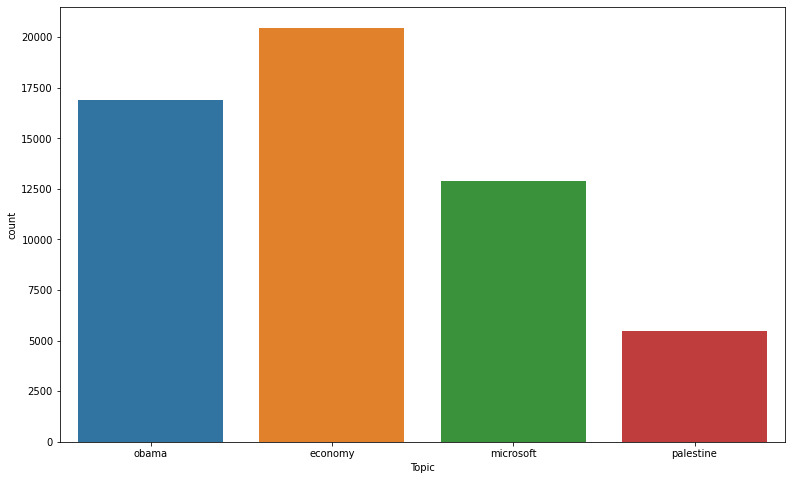

In [ ]:
plt.figure(figsize=(13,8))
sns.countplot(df['Topic'])

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['Palestinian','Palestine','Microsoft','Economy','Obama','Barack'])

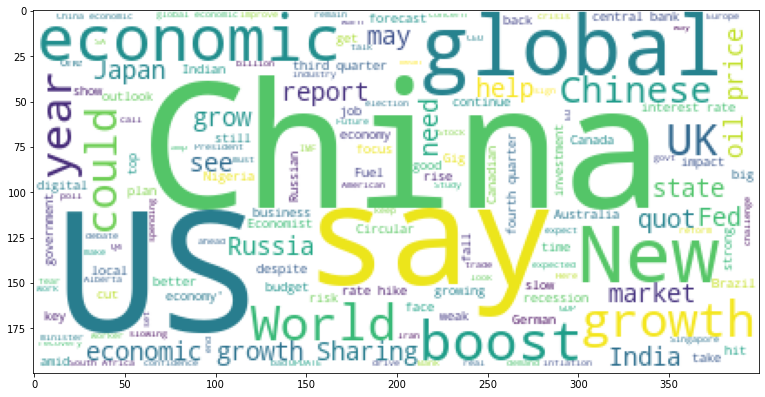

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(13,8))
text = ' '.join(df.Title[df['Topic']=='economy'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

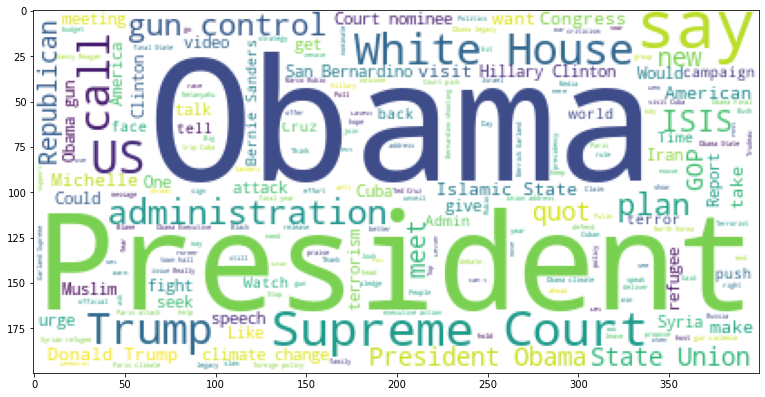

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(13,8))
text = ' '.join(df.Title[df['Topic']=='obama'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

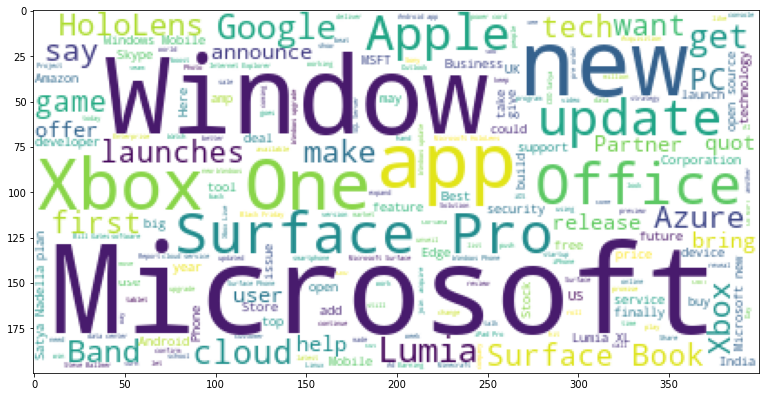

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(13,8))
text = ' '.join(df.Title[df['Topic']=='microsoft'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

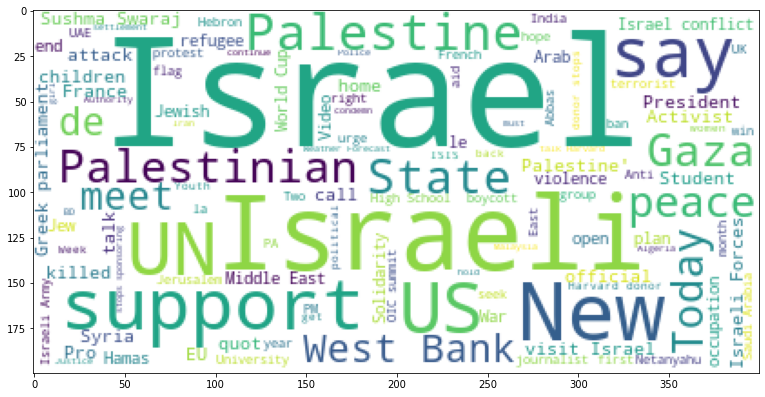

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(13,8))
text = ' '.join(df.Title[df['Topic']=='palestine'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

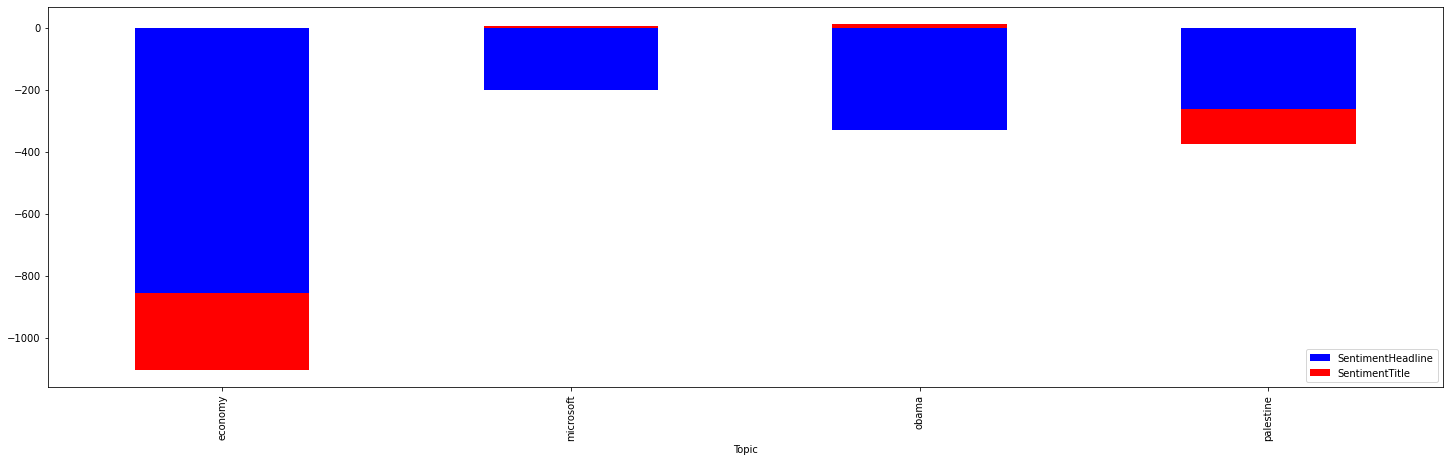

In [ ]:

df.groupby('Topic').agg('sum')[['SentimentHeadline', 'SentimentTitle']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, color=['b', 'r', 'g']);

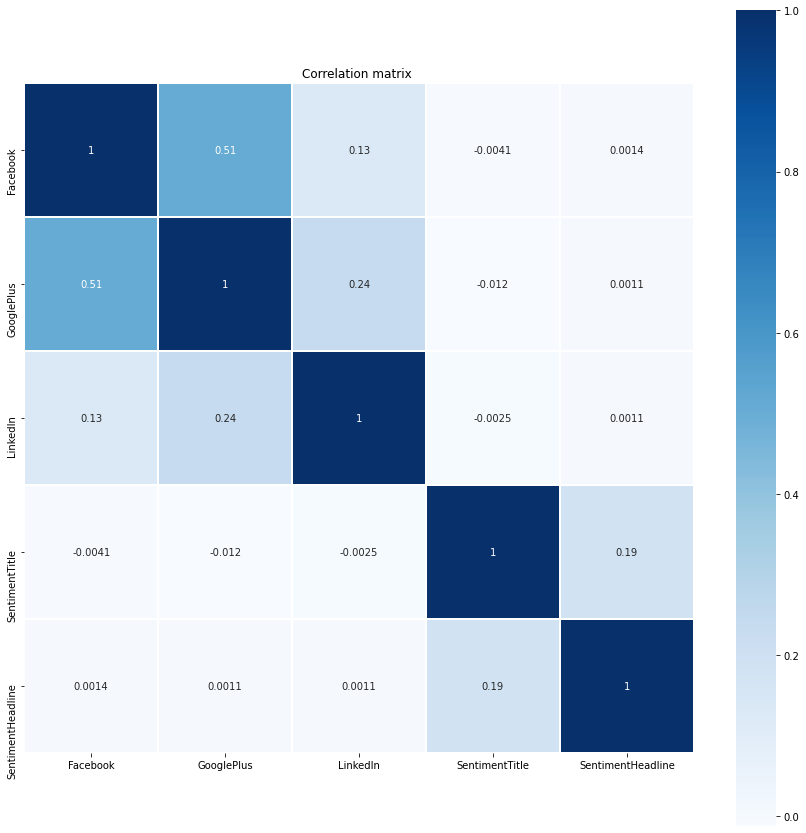

In [ ]:

plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')

plt.show()

In [ ]:
nlp = English()

In [ ]:
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
import re
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from sklearn.feature_extraction.text import HashingVectorizer

In [ ]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}


def clean_text(text):
   
    return text.strip().lower()

In [ ]:
bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(1,2))

In [ ]:
X_train_title = df.loc[:,'Title'].values
y_train_title = df.loc[:,['SentimentTitle']].values

X_train_headline = df.loc[:,'Headline'].values
y_train_headline = df.loc[:,['SentimentHeadline']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train_title, x_valid_title, Y_train_title, y_valid_title = train_test_split(X_train_title, y_train_title, shuffle = True, test_size = 0.15)
x_train_headline, x_valid_headline, Y_train_headline, y_valid_headline = train_test_split(X_train_headline, y_train_headline, shuffle = True, test_size = 0.15)

In [ ]:
xgboost = MultiOutputRegressor(XGBRegressor())
rand_for = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=None,
                                                          random_state=0))

In [ ]:
pipe_title = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', rand_for)])

pipe_headline = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', rand_for)])

In [ ]:
pipe_title.fit(x_train_title,Y_train_title)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f96df0c6dd8>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=100, min_df=1, ngram_range=(1, 2),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 to...
                 MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                                      ccp_alpha=0.0,
                                                                      criterion='mse',
                                                                      max_depth=None,
      

In [ ]:
test_pred_title=pipe_title.predict(x_valid_title)

In [ ]:
pipe_headline.fit(x_train_headline,Y_train_headline)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f96df0c6128>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=100, min_df=1, ngram_range=(1, 2),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 to...
                 MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                                      ccp_alpha=0.0,
                                                                      criterion='mse',
                                                                      max_depth=None,
      

In [ ]:
test_pred_headline=pipe_headline.predict(x_valid_headline)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_title=mean_absolute_error(y_valid_title,test_pred_title)
mae_headline=mean_absolute_error(y_valid_headline,test_pred_headline)

In [ ]:
score=1-((0.4*mae_title)+(0.6*mae_headline))

In [ ]:
print("Score = {} \nScore(out of 100%) = {}%".format(score,score*100))

Score = 0.9046467463889578 
Score(out of 100%) = 90.46467463889579%
